<h1 align='center'>Bank Customer Churn Prediction Using Artificial Neural Networks (ANN)</h1>

###### By: [jihad akbar](https://github.com/jihadakbr) | Dataset: [Airbnb 2022](http://insideairbnb.com/get-the-data/)

# Table of Contents

1. Importing Required Libraries
2. Data Cleaning<br/>
2a. Listings.csv File<br/>
2b. Calendar.csv File<br/>
2c. Reviews.csv File

# 1. Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from airbnb_utils import *

# 2. Data Cleaning

## 2a. Listings.csv File

In [2]:
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20221220053924,2022-12-20,city scrape,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington, DC","I am a literary scholar, teacher, poet, vegan ...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86177,-76.98966,Private room in home,Private room,1,NaN,1 private bath,1.0,1.0,"[""Indoor fireplace"", ""Free street parking"", ""B...",$67.00,31,365,31.0,31.0,365.0,365.0,31.0,365.0,NaN,t,30,60,90,365,2022-12-20,81,4,0,2010-11-01,2022-07-06,4.63,4.72,4.43,4.90,4.83,3.86,4.62,NaN,f,1,0,1,0,0.55
1,196429,https://www.airbnb.com/rooms/196429,20221220053924,2022-12-20,city scrape,"Takoma Garden apt-Lush yard,pets ok",Private Garden apt in SF home with Full size b...,Small town feel in big city. Takoma Park is a...,https://a0.muscache.com/pictures/1768756/9d738...,956417,https://www.airbnb.com/users/show/956417,Julia,2011-08-11,"Washington, DC",Professional Mom welcomes you to our home wher...,NaN,NaN,75%,f,https://a0.muscache.com/im/users/956417/profil...,https://a0.muscache.com/im/users/956417/profil...,Takoma,1,6,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Takoma, Brightwood, Manor Park",NaN,38.96995,-77.01984,Entire guest suite,Entire home/apt,3,NaN,1 bath,NaN,2.0,"[""Pets allowed"", ""Bathtub"", ""Free street parki...",$125.00,31,1125,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,23,53,83,358,2022-12-20,7,1,0,2013-04-23,2022-04-01,4.20,4.40,4.20,5.00,5.00,4.60,4.20,NaN,f,1,1,0,0,0.06
2,198685,https://www.airbnb.com/rooms/198685,20221220053924,2022-12-20,city scrape,Private room in central location.,"Welcome, I'm happy to share my home with you. ...",The neighborhood is quiet for the most part bu...,https://a0.muscache.com/pictures/06e92870-bb6e...,966613,https://www.airbnb.com/users/show/966613,Robin,2011-08-13,"Washington, DC",I'm 41 and have daughter in college. Living an...,a few days or more,0%,61%,f,https://a0.muscache.com/im/pictures/user/cfe96...,https://a0.muscache.com/im/pictures/user/cfe96...,Old Soldiers' Home,1,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.93404,-77.01488,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Pets allowed"", ""Indoor fireplace"", ""Free str..

In [3]:
listings.shape

(6217, 75)

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6217 non-null   int64  
 1   listing_url                                   6217 non-null   object 
 2   scrape_id                                     6217 non-null   int64  
 3   last_scraped                                  6217 non-null   object 
 4   source                                        6217 non-null   object 
 5   name                                          6217 non-null   object 
 6   description                                   6165 non-null   object 
 7   neighborhood_overview                         4155 non-null   object 
 8   picture_url                                   6217 non-null   object 
 9   host_id                                       6217 non-null   i

In [5]:
listings['price'].dtype

dtype('O')

In [6]:
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [7]:
date_cols = {
    'last_scraped': '%Y/%m/%d',
    'host_since': '%Y/%m/%d',
    'calendar_last_scraped': '%Y/%m/%d',
    'first_review': '%Y/%m/%d',
    'last_review': '%Y/%m/%d'
}

for col, fmt in date_cols.items():
    listings[col] = pd.to_datetime(listings[col], format=fmt)

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            6217 non-null   int64         
 1   listing_url                                   6217 non-null   object        
 2   scrape_id                                     6217 non-null   int64         
 3   last_scraped                                  6217 non-null   datetime64[ns]
 4   source                                        6217 non-null   object        
 5   name                                          6217 non-null   object        
 6   description                                   6165 non-null   object        
 7   neighborhood_overview                         4155 non-null   object        
 8   picture_url                                   6217 non-null   object

In [9]:
listings.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       52
neighborhood_overview                           2062
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    856
host_about                                      2110
host_response_time                              1325
host_response_rate                              1325
host_acceptance_rate                             892
host_is_superhost                             

In [10]:
listings.isnull().sum().sum()

46299

In [11]:
listings.duplicated().sum()

0

In [12]:
listings = listings.drop(['description', 'host_about', 'neighborhood_overview', 'license'], axis = 1)

In [13]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20221220053924,2022-12-20,city scrape,Vita's Hideaway,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington, DC",NaN,NaN,100%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86177,-76.98966,Private room in home,Private room,1,NaN,1 private bath,1.0,1.0,"[""Indoor fireplace"", ""Free street parking"", ""B...",67.0,31,365,31.0,31.0,365.0,365.0,31.0,365.0,NaN,t,30,60,90,365,2022-12-20,81,4,0,2010-11-01,2022-07-06,4.63,4.72,4.43,4.9,4.83,3.86,4.62,f,1,0,1,0,0.55


In [14]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.217000e+03,6.217000e+03,6.217000e+03,6217.000000,6217.000000,0.0,6217.000000,6217.000000,6217.000000,0.0,5634.000000,6072.000000,6217.000000,6217.000000,6.217000e+03,6216.000000,6216.000000,6.216000e+03,6.216000e+03,6216.000000,6.216000e+03,0.0,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,6217.000000,4925.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,4901.000000,6217.000000,6217.000000,6217.000000,6217.000000,4925.000000
mean,1.507328e+17,2.022122e+13,1.154536e+08,250.971047,356.891748,NaN,38.910146,-77.015140,3.660608,NaN,1.634718,1.982378,178.202347,21.811163,2.240987e+03,21.843308,33.980534,1.384335e+06,2.075320e+06,32.975579,2.072131e+06,NaN,13.994049,32.039730,50.504906,188.570372,51.725591,14.320733,0.752453,4.718345,4.803785,4.756888,4.861188,4.843016,4.776372,4.694134,28.792826,21.052759,7.314139,0.322020,1.855131
std,2.841390e+17,2.851792e+00,1.327067e+08,890.629849,1210.126587,NaN,0.024366,0.030696,2.408823,NaN,1.052522,1.401291,705.550794,40.717326,1.268193e+05,42.376479,74.736698,5.446283e+07,6.669227e+07,72.648391,6.659022e+07,NaN,11.730270,23.793909,35.690644,138.698806,87.497018,23.608094,1.805808,0.508506,0.351657,0.367120,0.314026,0.340186,0.357612,0.400850,58.787649,50.685333,29.638300,1.804618,2.355270
min,3.686000e+03,2.022122e+13,4.492000e+03,1.000000,1.000000,NaN,38.820780,-77.109000,0.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.084250e+07,2.022122e+13,1.601717e+07,1.000000,2.000000,NaN,38.897556,-77.034850,2.000000,NaN,1.000000,1.000000,83.000000,2.000000,1.060000e+02,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,0.000000,0.000000,4.000000,59.000000,1.000000,0.000000,0.000000,4.670000,4.760000,4.680000,4.860000,4.830000,4.710000,4.630000,1.000000,1.000000,0.000000,0.000000,0.320000
50%,4.187946e+07,2.022122e+13,5.038247e+07,3.000000,4.000000,NaN,38.909550,-77.017540,3.000000,NaN,1.000000,2.000000,119.000000,15.000000,3.650000e+02,7.000000,30.000000,1.125000e+03,1.125000e+03,18.900000,1.125000e+03,NaN,14.000000,39.000000,62.000000,179.000000,14.000000,3.000000,0.000000,4.850000,4.910000,4.870000,4.950000,4.950000,4.890000,4.800000,2.000000,1.000000,0.000000,0.000000,1.190000
75%,5.353049e+07,2.022122e+13,1.747920e+08,19.000000,30.000000,NaN,38.922870,-76.995360,4.000000,NaN,2.000000,2.000000,180.000000,31.000000,1.125000e+03,31.000000,31.000000,1.125000e+03,1.125000e+03,31.000000,1.125000e+03,NaN,26.000000,56.000000,85.000000,340.000000,62.000000,21.000000,1.000000,4.960000,5.000000,4.980000,5.000000,5.000000,5.000000,4.910000,13.000000,5.000000,1.000000,0.000000,2.730000
max,7.855798e+17,2.022122e+13,4.915968e+08,4608.000000,7476.000000,NaN,38.992140,-76.909270,16.000000,NaN,15.000000,20.000000,51534.000000,1125.000000,9.999999e+06,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,892.000000,507.00

In [15]:
listings.shape

(6217, 71)

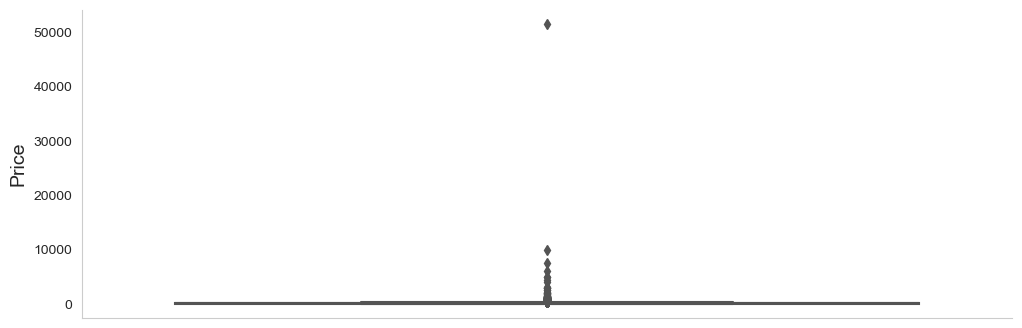

In [16]:
outliers_graph(listings,"price")

In [17]:
for i in range(5):
    listings = filter_outliers(listings, "price")
    print(f"Outliers remover running ({i+1} times)")

Outliers remover running (1 times)
Outliers remover running (2 times)
Outliers remover running (3 times)
Outliers remover running (4 times)
Outliers remover running (5 times)


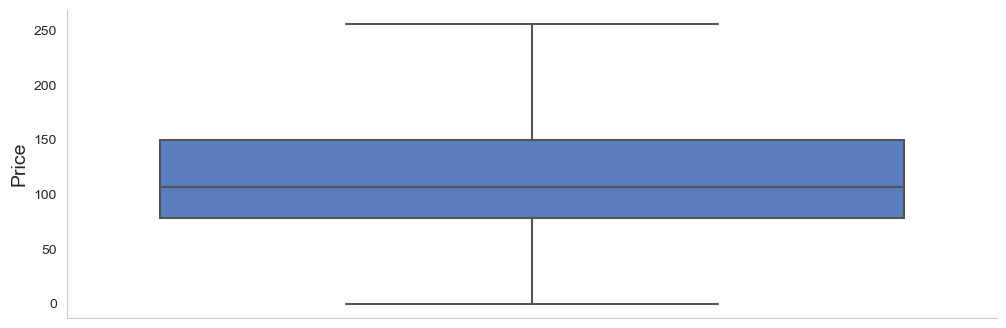

In [18]:
outliers_graph(listings,"price")

In [19]:
listings.shape

(5409, 71)

In [20]:
print("Removed Outliers Data = " + str((6217 - 5409) / 6217 * 100) + "%")

Removed Outliers Data = 12.996622165031365%


The omitted data only have small effect on the overall data (i.e. < 15%)

In [21]:
listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [22]:
conditions = [
    (listings['price'] <= 50),
    (listings['price'] > 50) & (listings['price'] <= 150),
    (listings['price'] > 150)
]
values = ['Cheap (<= 50)', 'Moderate (50-150)', 'Expensive (> 150)']
listings['price_category'] = np.select(conditions, values)

In [23]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_category
0,3686,https://www.airbnb.com/rooms/3686,20221220053924,2022-12-20,city scrape,Vita's Hideaway,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington, DC",NaN,NaN,100%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86177,-76.98966,Private room in home,Private room,1,NaN,1 private bath,1.0,1.0,"[""Indoor fireplace"", ""Free street parking"", ""B...",67.0,31,365,31.0,31.0,365.0,365.0,31.0,365.0,NaN,t,30,60,90,365,2022-12-20,81,4,0,2010-11-01,2022-07-06,4.63,4.72,4.43,4.9,4.83,3.86,4.62,f,1,0,1,0,0.55,Moderate (50-150)


In [24]:
listings["price_category"].unique()

array(['Moderate (50-150)', 'Cheap (<= 50)', 'Expensive (> 150)'],
      dtype=object)

In [25]:
# Save to csv
listings.to_csv('listings_cleaned.csv')

## 2b. Calendar.csv File

In [26]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3686,2022-12-20,t,$67.00,$67.00,31,365
1,3686,2022-12-21,t,$67.00,$67.00,31,365
2,3686,2022-12-22,t,$67.00,$67.00,31,365
3,3686,2022-12-23,t,$67.00,$67.00,31,365
4,3686,2022-12-24,t,$67.00,$67.00,31,365


In [27]:
calendar.shape

(2268840, 7)

In [28]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268840 entries, 0 to 2268839
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 121.2+ MB


In [29]:
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [30]:
calendar['date'] = pd.to_datetime(calendar['date'], format = '%Y/%m/%d')

In [31]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268840 entries, 0 to 2268839
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  object        
 5   minimum_nights  int64         
 6   maximum_nights  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 121.2+ MB


In [32]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [33]:
calendar.duplicated().sum()

0

In [34]:
calendar.describe()

,listing_id,price,minimum_nights,maximum_nights
count,2.268840e+06,2.268840e+06,2.268840e+06,2.268840e+06
mean,1.507570e+17,2.152104e+02,3.296978e+01,2.071522e+06
std,2.841326e+17,5.548501e+02,7.319694e+01,6.662605e+07
min,3.686000e+03,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.083391e+07,8.900000e+01,2.000000e+00,3.650000e+02
50%,4.187920e+07,1.330000e+02,2.000000e+01,1.125000e+03
75%,5.353524e+07,2.140000e+02,3.100000e+01,1.125000e+03
max,7.855798e+17,9.011700e+04,1.125000e+03,2.147484e+09


In [35]:
calendar.shape

(2268840, 7)

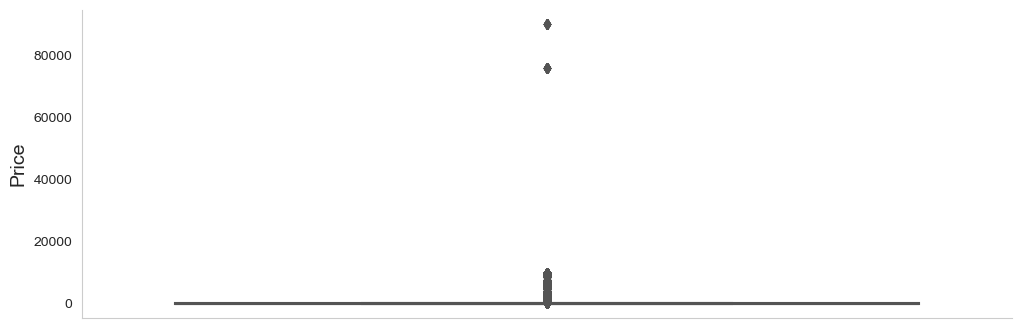

In [36]:
outliers_graph(calendar,"price")

In [37]:
for i in range(10):
    calendar = filter_outliers(calendar, "price")
    print(f"Outliers remover running ({i+1} times)")

Outliers remover running (1 times)
Outliers remover running (2 times)
Outliers remover running (3 times)
Outliers remover running (4 times)
Outliers remover running (5 times)
Outliers remover running (6 times)
Outliers remover running (7 times)
Outliers remover running (8 times)
Outliers remover running (9 times)
Outliers remover running (10 times)


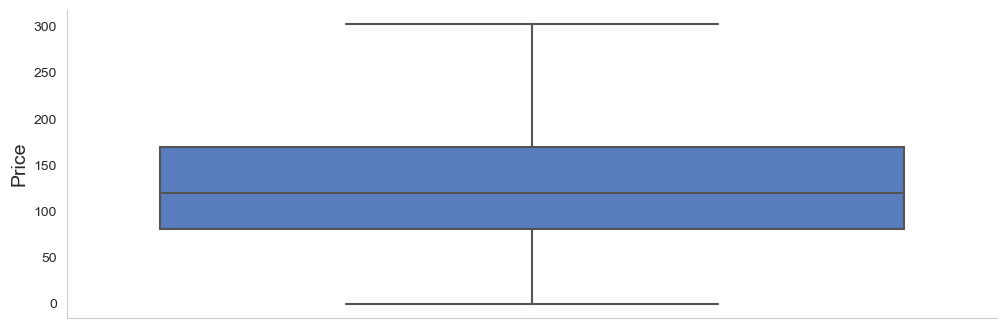

In [38]:
outliers_graph(calendar,"price")

In [39]:
calendar.shape

(1946812, 7)

In [40]:
print("Removed Outliers Data = " + str((2268840 - 1946812) / 2268840 * 100) + "%")

Removed Outliers Data = 14.19350857707022%


The omitted data only have small effect on the overall data (i.e. < 15%)

In [41]:
# Save to csv
calendar.to_csv('calendar_cleaned.csv')

## 2c. Reviews.csv File

In [42]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly..."
2,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m..."
3,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me..."
4,3686,213212,2011-03-30,428455,Pete,Great host! Very welcoming and organised. I st...


In [43]:
reviews.shape

(321578, 6)

In [44]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321578 entries, 0 to 321577
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     321578 non-null  int64 
 1   id             321578 non-null  int64 
 2   date           321578 non-null  object
 3   reviewer_id    321578 non-null  int64 
 4   reviewer_name  321577 non-null  object
 5   comments       321496 non-null  object
dtypes: int64(3), object(3)
memory usage: 14.7+ MB


In [45]:
reviews = reviews.astype({'listing_id': str, 'id': str, 'reviewer_id': str})
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y/%m/%d')

In [46]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321578 entries, 0 to 321577
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     321578 non-null  object        
 1   id             321578 non-null  object        
 2   date           321578 non-null  datetime64[ns]
 3   reviewer_id    321578 non-null  object        
 4   reviewer_name  321577 non-null  object        
 5   comments       321496 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.7+ MB


In [47]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         82
dtype: int64

In [48]:
reviews.duplicated().sum()

0

In [49]:
reviews = reviews.drop('comments', axis = 1)

In [50]:
reviews.head(1)

,listing_id,id,date,reviewer_id,reviewer_name
0,3686,131293,2010-11-01,257234,Callie


In [51]:
# Save to csv
reviews.to_csv('reviews_cleaned.csv')